In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Read data
df=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
#Display top 20 values
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Shape of dataset
print(df.shape)
# Columns in dataset
print(df.columns.tolist())

(303, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.astype('object').describe(include='all').loc['unique', :]

age          41.0
sex           2.0
cp            4.0
trestbps     49.0
chol        152.0
fbs           2.0
restecg       3.0
thalach      91.0
exang         2.0
oldpeak      40.0
slope         3.0
ca            5.0
thal          4.0
target        2.0
Name: unique, dtype: float64


# Attribute Information:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
     * Value 1: upsloping
     * Value 2: flat
     * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing

Coronary artery disease is the narrowing or blockage of the coronary arteries, usually caused by atherosclerosis.

# Numeric/Interval Data
age, trestbps, chol, thalach, oldpeak

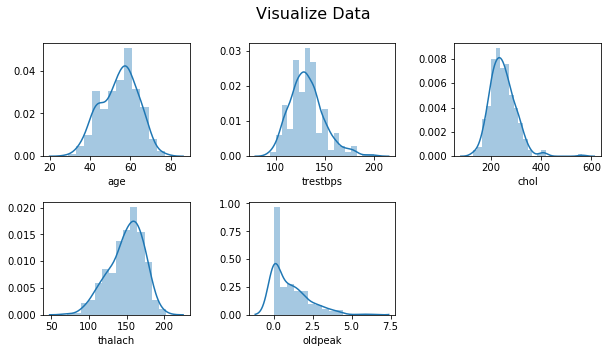

In [7]:
interval_cols=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
n_rows=2
n_cols=3
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Visualize Data", fontsize=16)
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c+1 #index
        if (i<6):
            ax=fig.add_subplot(2, 3, i)
            sns.distplot(df[interval_cols[i-1]])
plt.show()

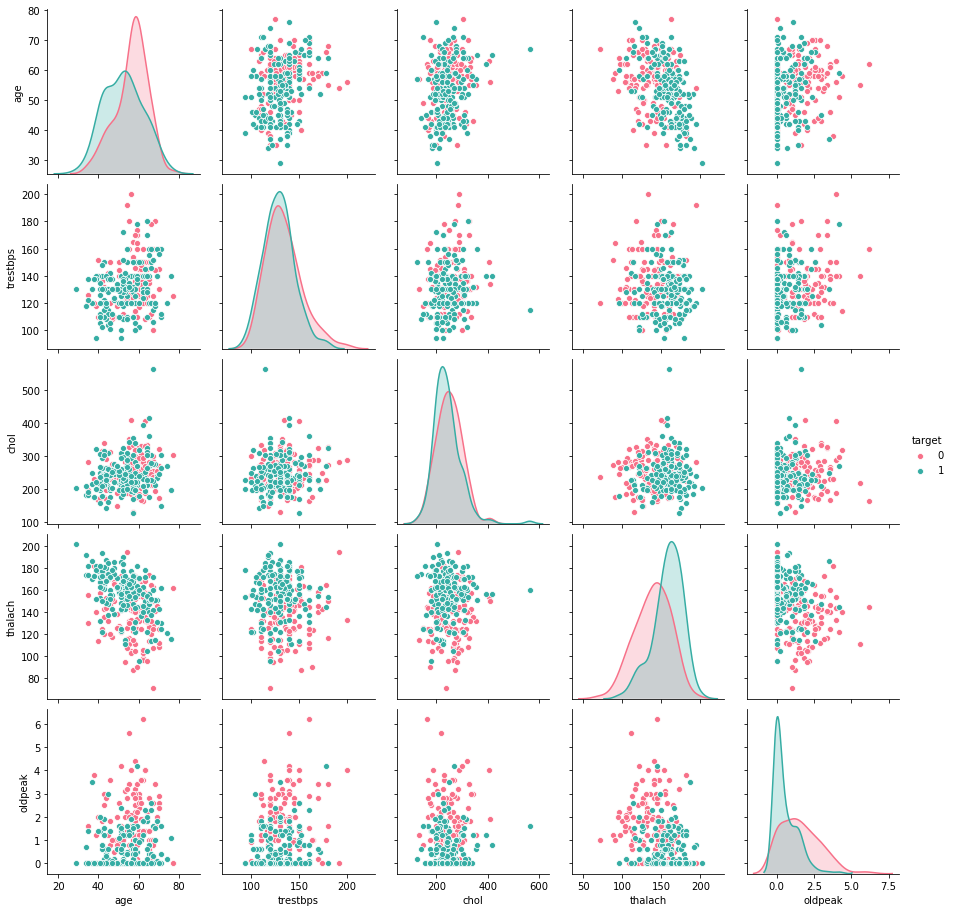

In [8]:
# Numeric variables only
sns.pairplot(df,hue='target',vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],palette="husl")

In [9]:
print(ss.normaltest(df['age']))
print(ss.normaltest(df['trestbps']))
print(ss.normaltest(df['chol']))
print(ss.normaltest(df['thalach']))
print(ss.normaltest(df['oldpeak']))

NormaltestResult(statistic=8.74798581312778, pvalue=0.012600826063683705)
NormaltestResult(statistic=28.567604502994023, pvalue=6.260708761946876e-07)
NormaltestResult(statistic=83.50370500964404, pvalue=7.368869203474054e-19)
NormaltestResult(statistic=13.46672289054534, pvalue=0.0011905243421222172)
NormaltestResult(statistic=66.6201580770229, pvalue=3.4167757949760942e-15)


With significance level of 0.05, we find that all numeric features are not normally distributed.

**Perform the Shapiro-Wilk test for normality** : suitable for smaller samples of data, e.g. thousands of observations or fewer.
Null hypothesis : Data is drawn from normal distribution  ....... p-value>alpha=0.05

In [10]:
print(ss.shapiro(df['age']))
print(ss.shapiro(df['trestbps']))
print(ss.shapiro(df['chol']))
print(ss.shapiro(df['thalach']))
print(ss.shapiro(df['oldpeak']))

(0.9863710999488831, 0.005800189916044474)
(0.965917706489563, 1.4579997014152468e-06)
(0.9468814134597778, 5.364669153351542e-09)
(0.9763151407241821, 6.620309432037175e-05)
(0.8441835045814514, 8.183467206576554e-17)


Thus, confirmed that with significance level of 0.05, all numeric features are not normally distributed. Thus, we will use non-parametric test.

# Tests for non-parametric data
For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve). 

https://towardsdatascience.com/everything-you-need-to-know-about-correlation-3ef78f22fcad

Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables. For data that is interval or ratio level. An example would be age.  An increase in age from 21 to 22 would be the same as an increase in age from 60 to 61. Kendall’s correlation requires the same data assumptions as Spearman’s correlation, which 1) ordinal, interval or ratio variables and 2) monotonic relationships between the two variables.

The Spearman rank correlation coefficient often denotes as ρ (rho) or rs, is the non-parametric version of the Pearson correlation coefficient. It can deal with ordinal, interval or ratio variables for monotonic relationships. In a monotonic relationship, the two variables tend to be one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases., but not necessarily at a constant rate

Dichotomous variables are nominal variables but only have two categories or levels. When we need to correlate a continuous variable with another dichotomous variable, we can use point biserial’s correlation. The point biserial calculation assumes that the continuous variable is normally distributed and homoscedastic. So cannot be used.
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

Non-parametric forms such as the Kruskal-Wallis H test. A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates another sample. The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic dominance obtains. For analyzing the specific sample pairs for stochastic dominance in post hoc testing, Dunn’s test, pairwise Mann-Whitney tests without Bonferroni correction, or the more powerful but less well-known Conover–Iman test are appropriate or t-tests when you use an ANOVA…might be worth calling that out. Since it is a non-parametric method, the Kruskal–Wallis test does not assume a normal distribution of the residuals, unlike the analogous one-way analysis of variance. The null hypothesis of the Kruskal–Wallis test is that the mean ranks of the groups are the same. p-value<alpha
https://www.statisticshowto.com/kruskal-wallis/

In [11]:
print(ss.kruskal(df['age'],df['target']))
print(ss.kruskal(df['trestbps'],df['target']))
print(ss.kruskal(df['chol'],df['target']))
print(ss.kruskal(df['thalach'],df['target']))
print(ss.kruskal(df['oldpeak'],df['target']))

KruskalResult(statistic=468.8276190153848, pvalue=5.766178243656257e-104)
KruskalResult(statistic=469.07709318121937, pvalue=5.088624509943085e-104)
KruskalResult(statistic=468.75308439719555, pvalue=5.985596392202087e-104)
KruskalResult(statistic=468.7677726841155, pvalue=5.941705642693988e-104)
KruskalResult(statistic=26.105891678206987, pvalue=3.231963238864363e-07)


Thus, the medians are same for all variables at significance level of 0.05. 

# Categorical Variables

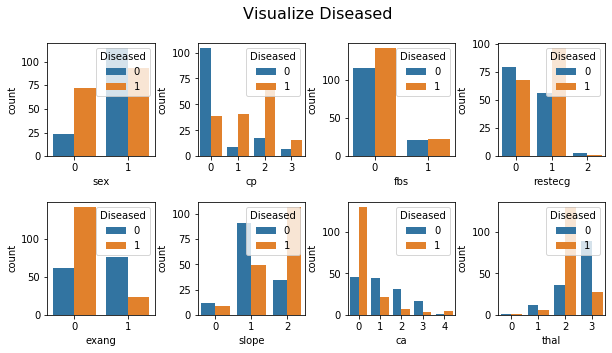

In [12]:
#Visualize diseased for categorical columns
categorical_cols=['sex','cp','fbs','restecg','exang','slope','ca','thal']
n_rows=4
n_cols=4
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Visualize Diseased", fontsize=16)
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c+1 #index
        if (i<9):
            ax=fig.add_subplot(2, 4, i)
            sns.countplot(df[categorical_cols[i-1]],hue=df['target'],ax=ax)
            ax.legend(title="Diseased",loc='upper right')
plt.show()

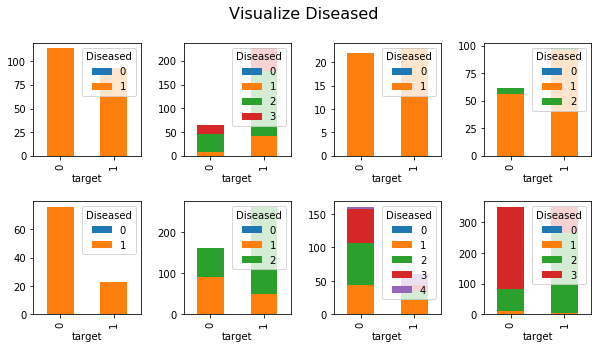

In [13]:
n_rows=4
n_cols=4
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Visualize Diseased", fontsize=16)
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c+1 #index
        if (i<9):
            ax=fig.add_subplot(2, 4, i)
            df.groupby(['target',categorical_cols[i-1]])[categorical_cols[i-1]].sum().unstack().plot(kind='bar', stacked=True,ax=ax)
            ax.legend(title="Diseased",loc='upper right')
# O is always missing

**Ordinal Variables** 
There are two types of categorical variable, nominal and ordinal. A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering.

If the categories you are referring to are, for example, positive/negative for some disease (or some other type of presence/absence response), then analysts can, and often do, view the data as ordinal.

On the other hand, many examples of binary data are clearly nominal.

* Nominal Variables - sex, ca
* Ordinal Variables - cp, fbs, restecg, exang, slope, thal

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables. The assumptions of the Spearman correlation are that data must be at least ordinal and the scores on one variable must be monotonically related to the other variable.

Chi-squared test() for nominal (categorical) data. The c2 test is used to determine whether an association (or relationship) between 2 categorical variables in a sample is likely to reflect a real association between these 2 variables in the population. C cannot be used to compare associations among tables with different numbers of categories or in tables with a mix of categorical and continuous variables. Further, other measures such as Cramer’s V can be a heavily biased estimator, especially compared to correlations between continuous variables and will tend to overestimate the strength of the association. One way to mitigate the bias in Cramer’s V is to use a kind of bias correction. The bias corrected Cramer’s V shown to typically have a much smaller mean square error.

# Tests for Ordinal and Nominal Data

In [14]:
#To Determine Relationship/Strength of association between categorical variables using bias corrected Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [15]:
for i in range(len(categorical_cols)):
    cv=cramers_v(df[categorical_cols[i]],df['target'])
    print(f'Strength of association between variables "{categorical_cols[i]:}" and "target" = {cv:}')

Strength of association between variables "sex" and "target" = 0.26814393851143675
Strength of association between variables "cp" and "target" = 0.5104126250202735
Strength of association between variables "fbs" and "target" = 0.0
Strength of association between variables "restecg" and "target" = 0.16292603007666398
Strength of association between variables "exang" and "target" = 0.4265285760727975
Strength of association between variables "slope" and "target" = 0.38815565394226487
Strength of association between variables "ca" and "target" = 0.48266011299468636
Strength of association between variables "thal" and "target" = 0.5220143995073976


fbs has no association with variable target so it must be dropped.

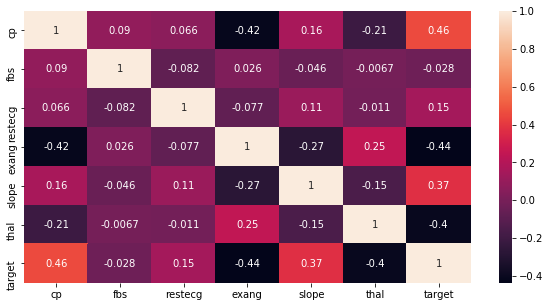

In [16]:
plt.figure(figsize = (10, 5))
ordi = df[['cp','fbs','restecg','exang','slope','thal','target']]
sns.heatmap(ordi.corr(method='spearman'),annot=True)

fbs can be ignored.

In [17]:
correlation, pval = ss.spearmanr(ordi['cp'],ordi['target'])
print(f'cp correlation={correlation:.6f}, p-value={pval:.6f}')
correlation, pval = ss.spearmanr(ordi['fbs'],ordi['target'])
print(f'fbs correlation={correlation:.6f}, p-value={pval:.6f}')
correlation, pval = ss.spearmanr(ordi['restecg'],ordi['target'])
print(f'restecg correlation={correlation:.6f}, p-value={pval:.6f}')
correlation, pval = ss.spearmanr(ordi['exang'],ordi['target'])
print(f'exang correlation={correlation:.6f}, p-value={pval:.6f}')
correlation, pval = ss.spearmanr(ordi['slope'],ordi['target'])
print(f'slope correlation={correlation:.6f}, p-value={pval:.6f}')
correlation, pval = ss.spearmanr(ordi['thal'],ordi['target'])
print(f'thal correlation={correlation:.6f}, p-value={pval:.6f}')

cp correlation=0.460860, p-value=0.000000
fbs correlation=-0.028046, p-value=0.626778
restecg correlation=0.148612, p-value=0.009582
exang correlation=-0.436757, p-value=0.000000
slope correlation=0.371460, p-value=0.000000
thal correlation=-0.403299, p-value=0.000000


fbs must be ignored.

In [18]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Missing Values


In [19]:
df.isnull().mean().sort_values(ascending = False)

target      0.0
thal        0.0
ca          0.0
slope       0.0
oldpeak     0.0
exang       0.0
thalach     0.0
restecg     0.0
fbs         0.0
chol        0.0
trestbps    0.0
cp          0.0
sex         0.0
age         0.0
dtype: float64

So, no missing value treatment

# Modeling / Classification / Prediction 

In [20]:
# With fbs
# Import module for dataset splitting
from sklearn.model_selection import train_test_split

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 1), 
                                                    df['target'], test_size = 0.2, 
                                                    random_state = 0)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)
acc_log = round(logisticRegression.score(X_train, y_train) * 100, 2)
acc_log

83.88

In [22]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logisticRegression.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,trestbps,0.749467
10,ca,0.184972
6,thalach,0.172302
7,exang,0.023075
4,fbs,-0.004232
0,sex,-0.005473
3,chol,-0.011473
5,restecg,-0.310665
9,slope,-0.557772
11,thal,-0.848437


Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

*     cp is highest negative coefficient
*     trestbps, thal, oldpeak are largest numbers by absolute value.

In [23]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.7755102  0.79591837 0.875      0.8125     0.8125    ]
0.8142857142857143


In [24]:
# Without fbs
# Import module for dataset splitting
from sklearn.model_selection import train_test_split

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','fbs'], axis = 1), 
                                                    df['target'], test_size = 0.2, 
                                                    random_state = 0)

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)
acc_log = round(logisticRegression.score(X_train, y_train) * 100, 2)
acc_log

85.12

In [26]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logisticRegression.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,trestbps,0.727283
9,ca,0.209014
5,thalach,0.193217
6,exang,0.023151
4,restecg,-0.004287
0,sex,-0.006891
3,chol,-0.011985
8,slope,-0.546822
10,thal,-0.857364
7,oldpeak,-0.892243


Values differ slightly.

In [27]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.7755102  0.79591837 0.875      0.83333333 0.8125    ]
0.818452380952381


In [28]:
# Predict!
predictions = logisticRegression.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

# Print the resulting confusion matrix
print(confusion_matrix(y_test, predictions))

[[21  6]
 [ 4 30]]


In [29]:
# Calculate Accuracy!
accuracy = (21 + 30) / (21 + 6 + 30 + 4)
print('accuracy is: ' + str(round(accuracy, 3)))
acc_test_log = round(logisticRegression.score(X_test, y_test) * 100, 2)
acc_test_log

accuracy is: 0.836


83.61

# SVC

In [30]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

66.53

In [31]:
acc_test_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_test_svc

68.85

# Linear SVC

In [32]:
# Linear SVC

linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

85.12

In [33]:
acc_test_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_test_linear_svc

83.61

#  KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn, knn.best_params_)

78.1 {'n_neighbors': 3}


In [35]:
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_test_knn

63.93

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

83.88

In [37]:
acc_test_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_test_gaussian

83.61

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [39]:
acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_test_decision_tree

75.41

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300, 500],'criterion' : ['gini', 'entropy'],'max_features': ['auto', 'log2'],'max_depth' : [3, 5, 7] }, cv=5).fit(X_train, y_train)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

92.98 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}


In [41]:
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_test_random_forest

86.89

# Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier
# Bagging Classifier

bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train)
acc_bagging_classifier = round(bagging_classifier.score(X_train, y_train) * 100, 2)
acc_bagging_classifier

98.35

In [43]:
Y_pred = bagging_classifier.predict(X_test).astype(int)
print(confusion_matrix(y_test,Y_pred))

[[21  6]
 [ 6 28]]


In [44]:
accuracy = (24 + 24) / (24 + 3 + 24 + 10)
print('accuracy is: ' + str(round(accuracy, 3)))

accuracy is: 0.787


In [45]:
acc_test_bagging_classifier = round(bagging_classifier.score(X_test, y_test) * 100, 2)
acc_test_bagging_classifier

80.33

# Performance of Models

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 'k-Nearest Neighbors', 'Naive Bayes',  
              'Decision Tree Classifier', 'Random Forest','Bagging Classifier'],
    
    'Score_train': [acc_log, acc_svc, acc_linear_svc, acc_knn, acc_gaussian, 
              acc_decision_tree, acc_random_forest, acc_bagging_classifier],
    'Score_test': [acc_test_log, acc_test_svc, acc_test_linear_svc, acc_test_knn, acc_test_gaussian,  
              acc_test_decision_tree, acc_test_random_forest, acc_test_bagging_classifier]
                    })
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
5,Decision Tree Classifier,100.00,75.41
7,Bagging Classifier,98.35,80.33
6,Random Forest,92.98,86.89
0,Logistic Regression,85.12,83.61
2,Linear SVC,85.12,83.61
4,Naive Bayes,83.88,83.61
3,k-Nearest Neighbors,78.10,63.93
1,Support Vector Machines,66.53,68.85
